# Lab 9: Randomized Response and Differential Privacy

In class we discussed an example of randomized response (see slides 4–7 and slide 39 here: [7: Differential Privacy](https://dataresponsibly.github.io/rds/assets/7_privacy_202.pdf)). We introduced a game of "Truth or Dare" where a population are asked a (potentially) incriminating question, such as "Did you go out drinking at the weekend?" The person would then:

1. Flip a coin **C1**
  1. if C1 is tails, then **respond truthfully**
  2. if C1 is heads, then flip another coin **C2**
    1. if C2 is heads then respond **Yes**
    2. else C2 is tails then respond **No**

This algorithm is an example of localized random response and it provides some privacy guarantees and calculate the privacy parameter, epsilon.

In this notebook, we will work through this example. Then we will modify our randomized response algorithm to see how this affects our privacy guarantees.


## Setup 

First, our usual step of importing packages.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Randomized response algorithm

<img src="https://drive.google.com/uc?export=view&id=1RnipTYF6EKZ9ZLYfSOmG_1yHNWwKEtCI" width="300">

Below we define a function for our randomized response algorithm from class. This algorithm is depicted by the figure, above. We set `truth='Yes'` as our default argument to match the discussion in class, but it would also work with `Truth='No'`. Read through it and make sure you understand how it works.

In [2]:
def randomized_algorithm1(truth='Yes'):
  
  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Tails'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Heads'):
      response = 'Yes'
    else:
      response = 'No'

  return response

Try running the algorithm below a few times and double check that you sometimes get "Yes" and sometimes "No" responses.

In [3]:
randomized_algorithm1()

'Yes'

### Calculating epsilon, our privacy parameter

The randomized algorithm we defined above provides a certain level of privacy, which we call epsilon. Below we will cover how to calculate epsilon.

#### Probability of "Yes" for a person whose true value is "Yes"

Let's start by taking the case where a person's true value is "Yes", i.e. `truth = 'Yes'`. How could that  person end up answering "Yes" in the randomized algorithm above?

> 1. They could flip C1 and it returns tails, in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get heads, and then flip C2 and get heads again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [4]:
P_C1_heads = 0.5
P_C1_tails = 0.5
P_C2_heads = 0.5

P_yes_given_yes = P_C1_tails + (P_C1_heads * P_C2_heads)
print(P_yes_given_yes)

0.75


#### Probability of "No" for a person whose true value is "No"

Now let's take the case where a person's true value is "No," i.e. `truth = 'No'`. How could that person end up answering 'Yes' based on our randomized algorithm?

1. They could flip C1 and it returns heads, and then flip C2 and get heads again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "No":

In [5]:
P_yes_given_no = P_C1_heads * P_C2_heads
print(P_yes_given_no)

0.25


#### Calculate epsilon for our first algorithm

We calculate epsilon by taking the probability that a person answered "Yes" because the truth for that person was "Yes" and dividing it by the probability that a person answered "Yes" even though the truth was "No."

This captures the idea of **plausible deniability**, which is foundational to differential privacy. A person could have answered "Yes" because they truthfully did go out drinking, or they could have answered "Yes" because they flipped a certain coin combination. We can't know which route lead the person to answering "Yes" by looking only at their response.

In [6]:
epsilon = np.log(P_yes_given_yes / P_yes_given_no)
print("epsilon:", epsilon)

epsilon: 1.0986122886681098


Note that we take the natural log.

## Adding a third coin flip to our algorithm

<img src="https://drive.google.com/uc?export=view&id=1st-P4QtaLeArF6TJlEilC44A_9tpeRrP" width="400">

Let's modify our algorithm and introduce a third coin, **C3**. We'll define a new algorithm called `randomized_algorithm2` based on the above figure. Spend some time reviewing the below function so that you understand it.

In [7]:
def randomized_algorithm2(truth='Yes'):
  
  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Tails'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'No'
    else:
      C3 = random.choice(['Heads', 'Tails'])
      if (C3 == 'Heads'):
        response = 'Yes'
      else:
        response = 'No'

  return response

Test the algorithm again to make sure it sometimes returns "Yes" and sometimes "No". You should run it a few times.

In [8]:
randomized_algorithm2()

'No'

### Calculate epsilon for our second algorithm

Think through the ways that a person whose true value is "Yes" could respond with "Yes" in our second algorithm. These are:

> 1. They could flip C1 and it returns tails, in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get heads, then flip C2 and get heads, and then flip C3 and get heads for a third time in a row, in which case they would answer "Yes."

Again, calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [9]:
P_C2_tails = 0.5
P_C3_heads = 0.5
P_C3_tails = 0.5

P_yes_given_yes2 = P_C1_tails + (P_C1_heads * P_C2_heads * P_C3_heads)
print(P_yes_given_yes2)

0.625


The probability of a person answering "Yes" given that the truth is "No" is also different in our second algorithm. The route to this answer is:

> 1. C1 heads, followed by C2 heads, followed by C3 heads



In [10]:
P_yes_given_no2 = P_C1_heads * P_C2_heads * P_C3_heads
print(P_yes_given_no2)

0.125


And now we can calculate epsilon for our second algorithm:

In [11]:
epsilon2 = np.log(P_yes_given_yes2 / P_yes_given_no2)
print("epsilon:", epsilon2)

epsilon: 1.6094379124341003


Recall that epsilon represents the strength of privacy from our algorithm, where a **lower value indicates stronger privacy**. Why is `epsilon2` for the second algorithm higher than `epsilon` from our first algorithm?

**Write your answer here and include your reasoning**

We add one more step in the second algorithm. The expect number of Yes is increasing. In other words, we are more certain about the data , meaning that the privacy is decreading. As that epsilon value increases, the risk that an individual user's specific data can be ascertained increases exponentially. 

## Keeping three coins, but changing our algorithm

<img src="https://drive.google.com/uc?export=view&id=1LZNwDkJNaAhj5OG3IfDeJbZm81n-E-xR" width="400">

In our third and final randomized response algorithm, we'll keep three coins but change the algorithm according to the figure above. Note that in our third algorithm, we flip a coin after C1 no matter what. We'll either flip C2 or C3 depending on C1. That means that every respondent will be guaranteed to flip two coins.

We define our third algorithm as follows:

In [12]:
def randomized_algorithm3(truth='Yes'):
  
  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Tails'):
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'
  else: 
    C3 = random.choice(['Heads', 'Tails'])
    if (C3 == 'Tails'):
      response = truth
    else:
      response = 'No'

  return response

Again, check that it works as anticipated:

In [13]:
randomized_algorithm3()

'No'

### Calculate epsilon for our third algorithm

Repeat the exercise from our first and second algorithm. What is the probability that a person will respond "Yes" given that the truth for that person is "Yes"?

**Write down the routes to a yes answer here**

Calculate the probability of `yes_given_yes` (i.e. the probability that a person responds yes and the truth is yes):

In [15]:
# your code here
p_yes_given_yes3 = (P_C1_heads * P_C2_heads) + (P_C1_tails * P_C3_tails)
print(p_yes_given_yes3)

0.5


And the probability of `yes_given_no` (i.e. the probability that a person responds yes even though the truth is no):

In [16]:
# your code here
P_yes_given_no3 = (P_C1_heads * P_C2_tails)
print(P_yes_given_no3)

0.25


Calculate epsilon by using the values `yes_given_yes` and `yes_given_no`:

In [18]:
# your code here
epsilon3 = np.log(p_yes_given_yes3 / P_yes_given_no3)
print("epsilon:", epsilon3)

epsilon: 0.6931471805599453


What do you observe about epsilon for the third algorithm?

**Write your answer here**

The epsilon is lower than the first two algorithm, indicating it has the strongest privacy.

## Example with data

Recall from class that, given our first randomized algorithm (called `randomized_algorithm1`), we can estimate the proportion of responses for whom we expect the truth to be "Yes" by the formula:



> $P(truth=Yes) = 2A - 0.5N$



where $A$ is the number of "Yes" responses we get. Above, denote the count of respondents by $N$.

Let's suppose we ask 100 people to respond to our incriminating question. Let's also suppose that the truth is "Yes" for 30 of those people and "No" for the other 70. If we ask each person to respond via our first randomized algorithm, we would estimate the number of true "Yes" from our 100 people to be:

In [ ]:
results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]

(results.count('Yes') * 2) - (0.5 * 100)

26.0

## Simulate count of 'Yes' responses

The above is just a one-shot example. Our estimate will vary each time we run the above cell because there's randomization involved. Let's simulate the distribution of estimates if we asked our population of 100 people to respond via the randomization algorithm over and over again. We'll simulate the randomized response 10,000 times and estimate the count of "Yes" responses each time.

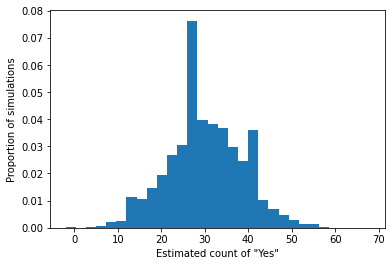

In [21]:
output = []*10000
for x in range(0, 10000):
  results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]
  output.append((results.count('Yes') * 2) - (0.5 * 100))

plt.hist(output, density=True, bins=30)  # density=False would make counts
plt.ylabel('Proportion of simulations')
plt.xlabel('Estimated count of "Yes"');


What do you observe from this distribution?

**Write your answer here**

Everytime we run, we gain a different distribution. The shape of the distribution is different each time. Therefore, we have randomized. 

## Optional: Create your own randomized response algorithm

Come up with your own randomized response algorithm, write a function for it, calculate epsilon, and see how it works in practice. You can use the above examples as a template.

In [ ]:
# your code here

Remember to submit this notebook as an .ipynb file on Brightspace > Lab 9.